# Heart Failure Prediction Model 

In [38]:
#import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import time
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [39]:
#get the data
df= pd.read_csv(r'C:\Users\6paan\Desktop\PROJECTS\heart_failure_clinical_records_dataset.csv')
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<AxesSubplot:>

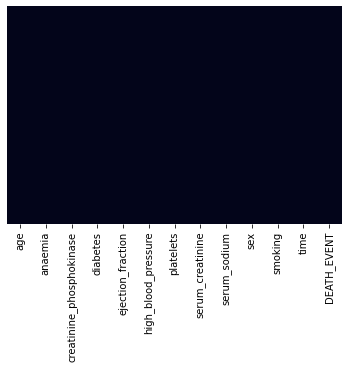

In [41]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

# no missing data

In [42]:
#Split the data into labels and target 
y = df["DEATH_EVENT"]
X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'high_blood_pressure', 'platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]

In [43]:
#split the labels and target into a train and test data set respectively 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=343)

In [44]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((239, 12), (60, 12), (239,), (60,))

# Feature Engineering

In [45]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [46]:
#use feature_importances of tree based classifiers
print(model.feature_importances_) 

[0.09501105 0.02628582 0.07831521 0.03118563 0.12859464 0.02318327
 0.07150876 0.11991663 0.08150945 0.02588127 0.02744422 0.29116404]


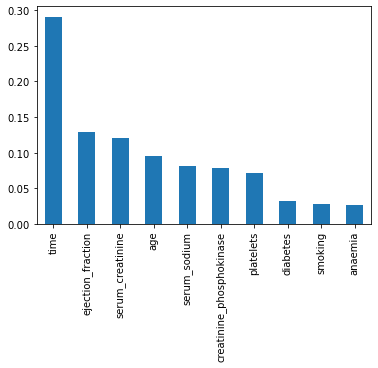

In [49]:
#plot graph of feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

In [50]:
#Scale the data 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Creating a model 

In [51]:
#using a RandomForestClassifier model for this data
rfc = RandomForestClassifier()

In [53]:
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [57]:
#using the accuracy error metric 
score = accuracy_score(y_test,y_pred)
score

0.85

In [60]:
#full on report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.80      0.67      0.73        18

    accuracy                           0.85        60
   macro avg       0.83      0.80      0.81        60
weighted avg       0.85      0.85      0.85        60

